In [53]:
#pip install matplotlib

In [54]:
import json
import matplotlib.pyplot as plt

In [55]:
folder = 'output/'
# folder = 'output_half_latent_loss/'

In [56]:
with open(folder + 'training_loss.json', 'r') as f:
    logs = json.load(f)

In [57]:
epochs = list(range(1, len(logs['train_loss']) + 1))

In [58]:
# Extract losses
train_loss = logs['train_loss']
disc = logs['disc_loss']
enc_gen = logs['enc_gen_loss']
cc = logs['cc_loss']

In [59]:
best_idx = logs.get('best_epoch_idx', None)

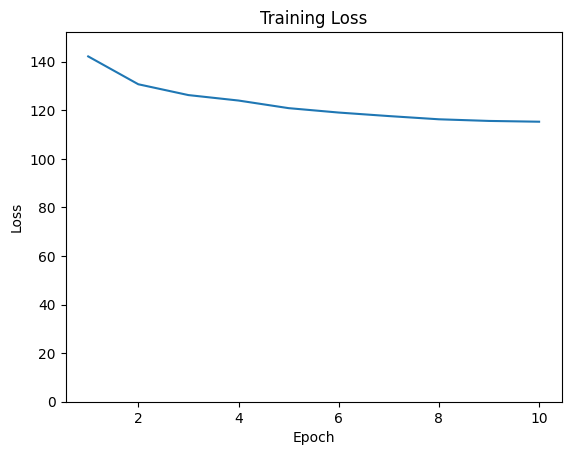

In [60]:
# 1) Training Loss
plt.figure()
plt.plot(epochs, train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.ylim(bottom=0, top=max(train_loss) + 10)

if best_idx is not None:
    plt.axvline(x=best_idx, linestyle='--', color='orange')
plt.savefig(f'{folder}/training_loss.png')
plt.show()


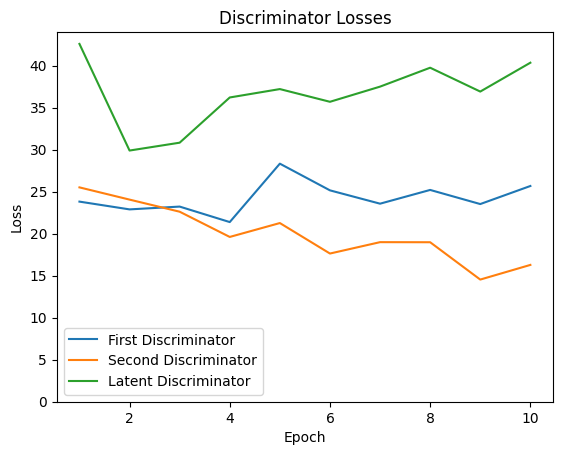

In [61]:
# 2) Discriminator Losses
plt.figure()
plt.plot(epochs, disc['first_loss'], label='First Discriminator')
plt.plot(epochs, disc['second_loss'], label='Second Discriminator')
plt.plot(epochs, disc['latent_loss'], label='Latent Discriminator')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Discriminator Losses')
plt.legend()
plt.ylim(bottom=0)

if best_idx is not None:
    plt.axvline(x=best_idx, linestyle='--', color='orange')

plt.savefig(f'{folder}/disc_losses.png')

plt.show()

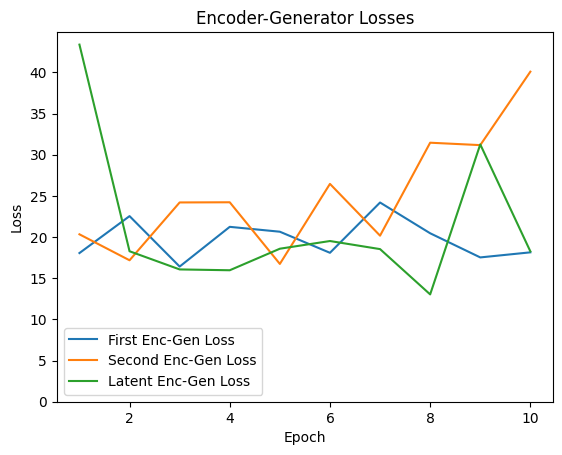

In [62]:
# 3) Encoder-Generator Losses
plt.figure()
plt.plot(epochs, enc_gen['first_loss'], label='First Enc-Gen Loss')
plt.plot(epochs, enc_gen['second_loss'], label='Second Enc-Gen Loss')
plt.plot(epochs, enc_gen['latent_loss'], label='Latent Enc-Gen Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Encoder-Generator Losses')
plt.legend()
plt.ylim(bottom=0)

if best_idx is not None:
    plt.axvline(x=best_idx, linestyle='--', color='orange')

plt.savefig(f'{folder}/enc_gen_losses.png')
plt.show()

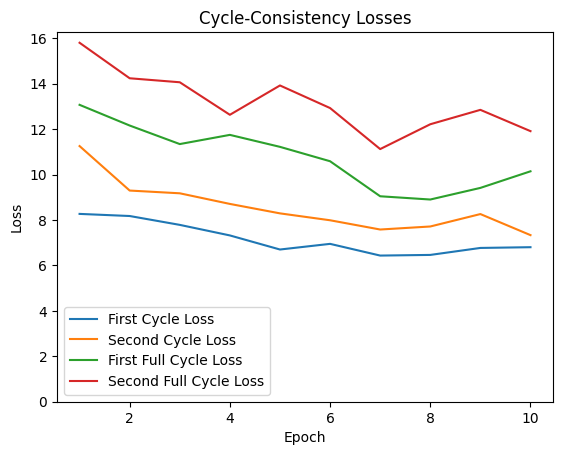

In [63]:
# 4) Cycle-Consistency Losses
plt.figure()
plt.plot(epochs, cc['first_cycle'], label='First Cycle Loss')
plt.plot(epochs, cc['second_cycle'], label='Second Cycle Loss')
plt.plot(epochs, cc['first_full_cycle'], label='First Full Cycle Loss')
plt.plot(epochs, cc['second_full_cycle'], label='Second Full Cycle Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Cycle-Consistency Losses')
plt.legend()
plt.ylim(bottom=0)

if best_idx is not None:
    plt.axvline(x=best_idx, linestyle='--', color='orange')
plt.savefig(f'{folder}/cc_losses.png')
plt.show()

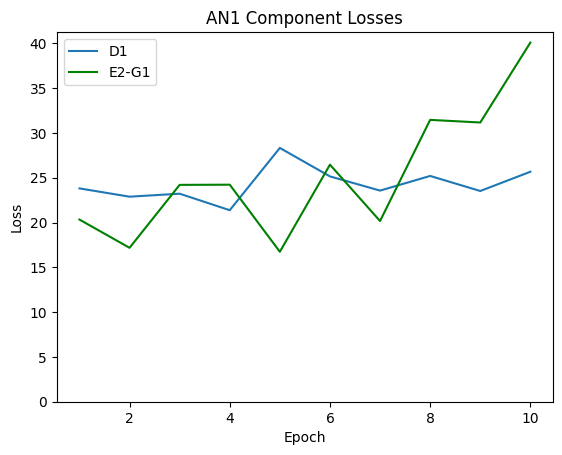

In [64]:
# 5) AN1 Components
plt.figure()
plt.plot(epochs, disc['first_loss'], label='D1', color='C0')
plt.plot(epochs, enc_gen['second_loss'], label='E2-G1', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('AN1 Component Losses')
plt.legend()
plt.ylim(bottom=0)

if best_idx is not None:
    plt.axvline(x=best_idx, linestyle='--', color='orange')

plt.show()

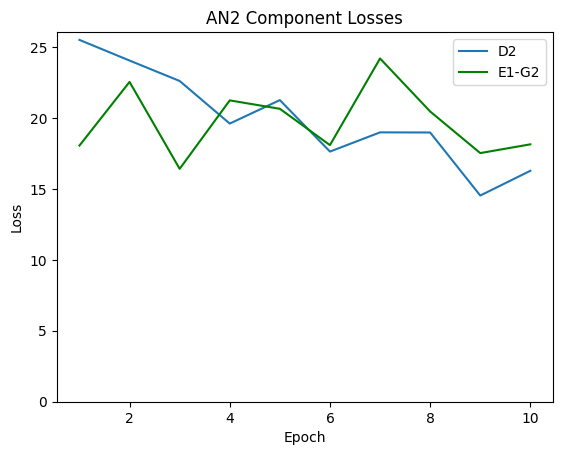

In [65]:
# 5) AN1 Components (Second D, First Enc-Gen)
plt.figure()
plt.plot(epochs, disc['second_loss'], label='D2')
plt.plot(epochs, enc_gen['first_loss'], label='E1-G2', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('AN2 Component Losses')
plt.legend()
plt.ylim(bottom=0)
if best_idx is not None:
    plt.axvline(x=best_idx, linestyle='--', color='orange')
plt.show()

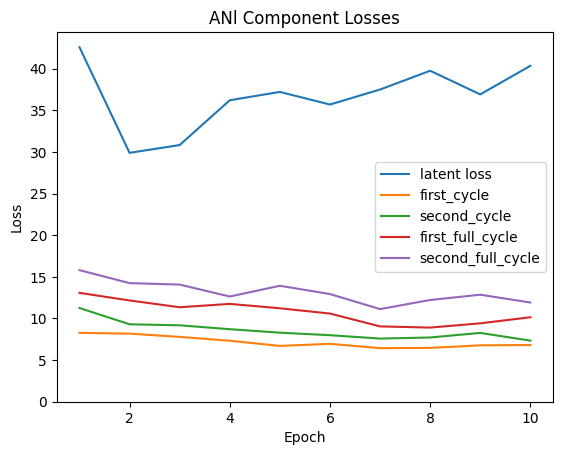

In [66]:
# 5) ANl Components 
plt.figure()
plt.plot(epochs, disc['latent_loss'], label='latent loss')
plt.plot(epochs, cc['first_cycle'], label='first_cycle')
plt.plot(epochs, cc['second_cycle'], label='second_cycle')
plt.plot(epochs, cc['first_full_cycle'], label='first_full_cycle')
plt.plot(epochs, cc['second_full_cycle'], label='second_full_cycle')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ANl Component Losses')
plt.legend()
plt.ylim(bottom=0)
if best_idx is not None:
    plt.axvline(x=best_idx, linestyle='--', color='grey')
plt.show()